# Import Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


In [3]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Import Dataset

This dataset will be used to predict housing price (medv) in Boston city with Penalized Linear Regression (Ridge and Lasso) method.

In [4]:
boston = pd.read_csv('boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Legends:

- Criminal rate (crim)
- Residential land zoned proportion (zn)
- Non-retail business acres proportion (indus)
- Is bounds with river (chas)
- Nitrogen oxides concentration (nox)
- Number rooms average (rm)
- Owner age proportion (age)
- Weighted distance to cities (dis)
- Accessibility index (rad)
- Tax rate (tax)
- Pupil-teacher ratio (ptratio)
- Black proportion (black)
- Percent lower status (lstat)

# Exploratory Data Analysis

In [5]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
boston.duplicated().any()

False

No missing value and duplicate data found in the dataset.

In [7]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [26]:
for col in boston.columns:
    print(f'Percentage of unique number in {col} :')
    print(round(boston[col].value_counts(normalize = True)*100,2))
    print()

Percentage of unique number in crim :
crim
0.01501     0.4
14.33370    0.4
0.03466     0.2
0.03113     0.2
0.03049     0.2
           ... 
1.51902     0.2
1.83377     0.2
1.46336     0.2
1.27346     0.2
0.04741     0.2
Name: proportion, Length: 504, dtype: float64

Percentage of unique number in zn :
zn
0.0      73.52
20.0      4.15
80.0      2.96
22.0      1.98
12.5      1.98
25.0      1.98
40.0      1.38
45.0      1.19
30.0      1.19
90.0      0.99
95.0      0.79
60.0      0.79
21.0      0.79
33.0      0.79
55.0      0.59
70.0      0.59
34.0      0.59
52.5      0.59
35.0      0.59
28.0      0.59
75.0      0.59
82.5      0.40
85.0      0.40
17.5      0.20
100.0     0.20
18.0      0.20
Name: proportion, dtype: float64

Percentage of unique number in indus :
indus
18.10    26.09
19.58     5.93
8.14      4.35
6.20      3.56
21.89     2.96
         ...  
1.21      0.20
1.38      0.20
3.75      0.20
0.46      0.20
2.31      0.20
Name: proportion, Length: 76, dtype: float64

Percentage of u

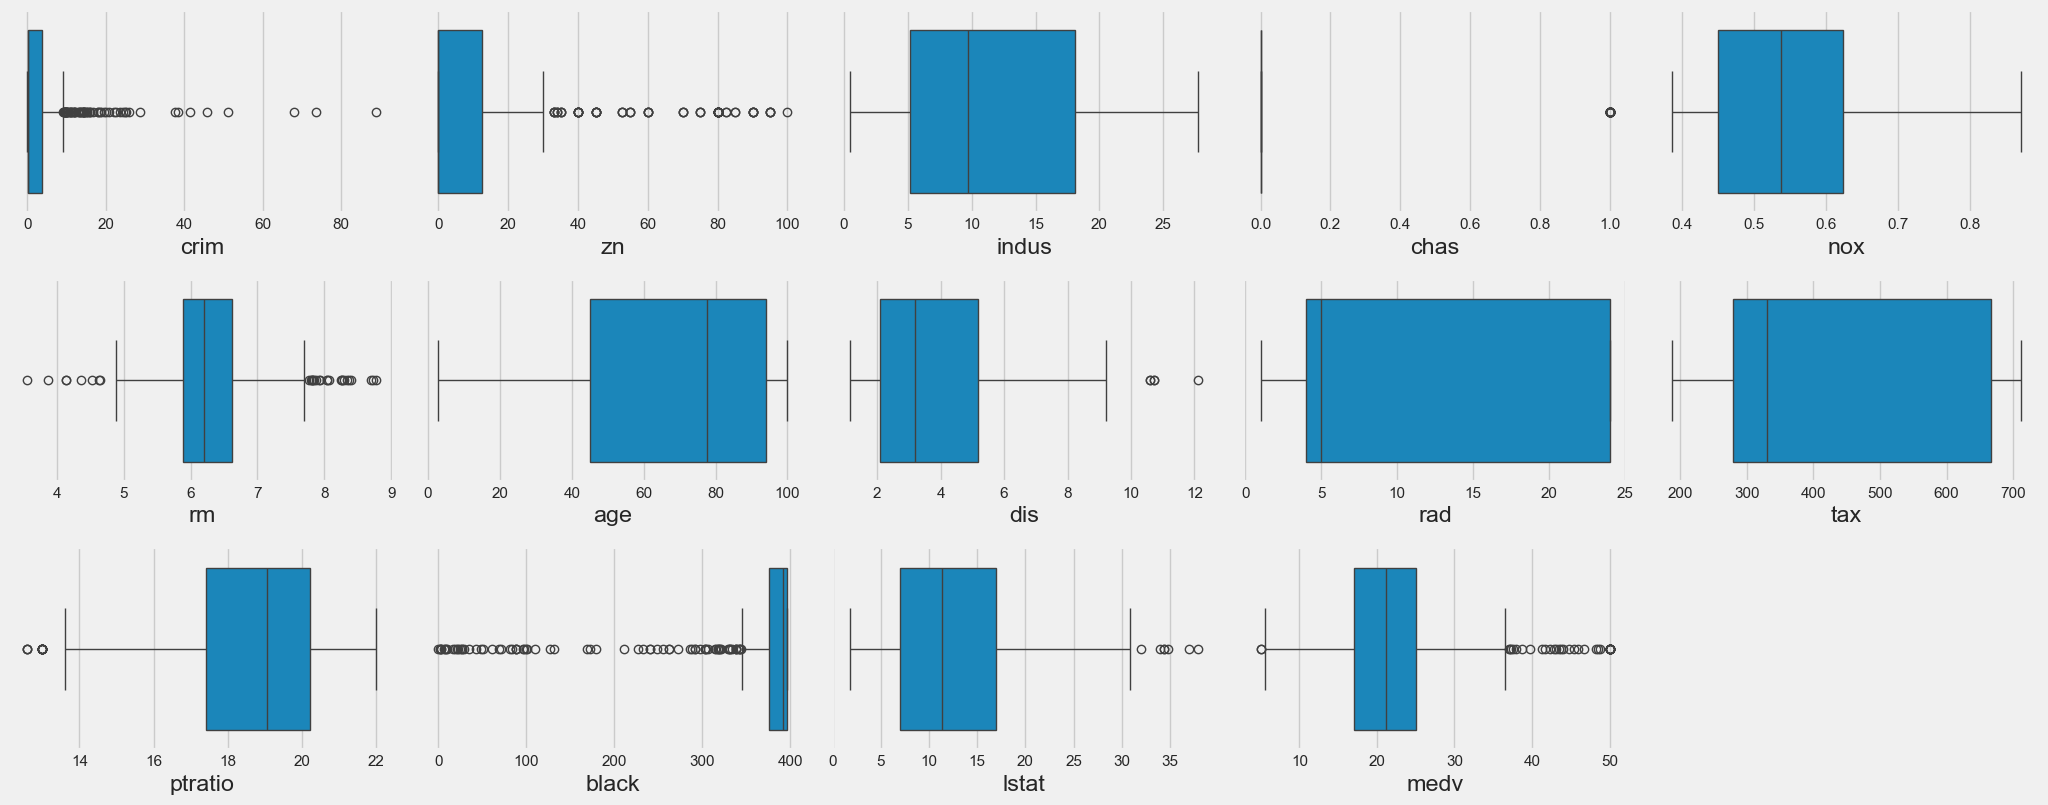

In [9]:
for i in range(0, len(boston.columns)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(x=boston[boston.columns[i]])
    plt.tight_layout()

# Data Train - Validation - Test Split

In [10]:
feature = boston.drop(columns='medv')
target = boston[['medv']]

# split between data train and data test
feature_boston_pretrain, feature_boston_test, target_boston_pretrain, target_boston_test = train_test_split(feature, target, test_size=0.20, random_state=42)

# split between data train and data validation for hyperparameter tuning (alpha value)
feature_boston_train, feature_boston_validation, target_boston_train, target_boston_validation = train_test_split(feature_boston_pretrain, target_boston_pretrain, test_size=0.20, random_state=42)

# Multicollinearity Check using Variance Inflation Factor (VIF) and Heatmap Correlation

In [11]:
X = add_constant(feature_boston_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()

vif_df.columns = ['feature','vif_score']

vif_df = vif_df.loc[vif_df.feature!='const']

vif_df

,feature,vif_score
1,crim,1.750939
2,zn,2.473421
3,indus,3.741988
4,chas,1.110042
5,nox,4.585650
6,rm,1.972174
7,age,3.127443
8,dis,4.390458
9,rad,7.182410
10,tax,8.268145


There are 4 features with moderate multi-collinearity (4-10): 
- nox (4.585650)
- dis (4.390458)
- rad (7.182410)
- tax (8.268145)

The detailed correlation will be analyzed by using heatmap correlation.

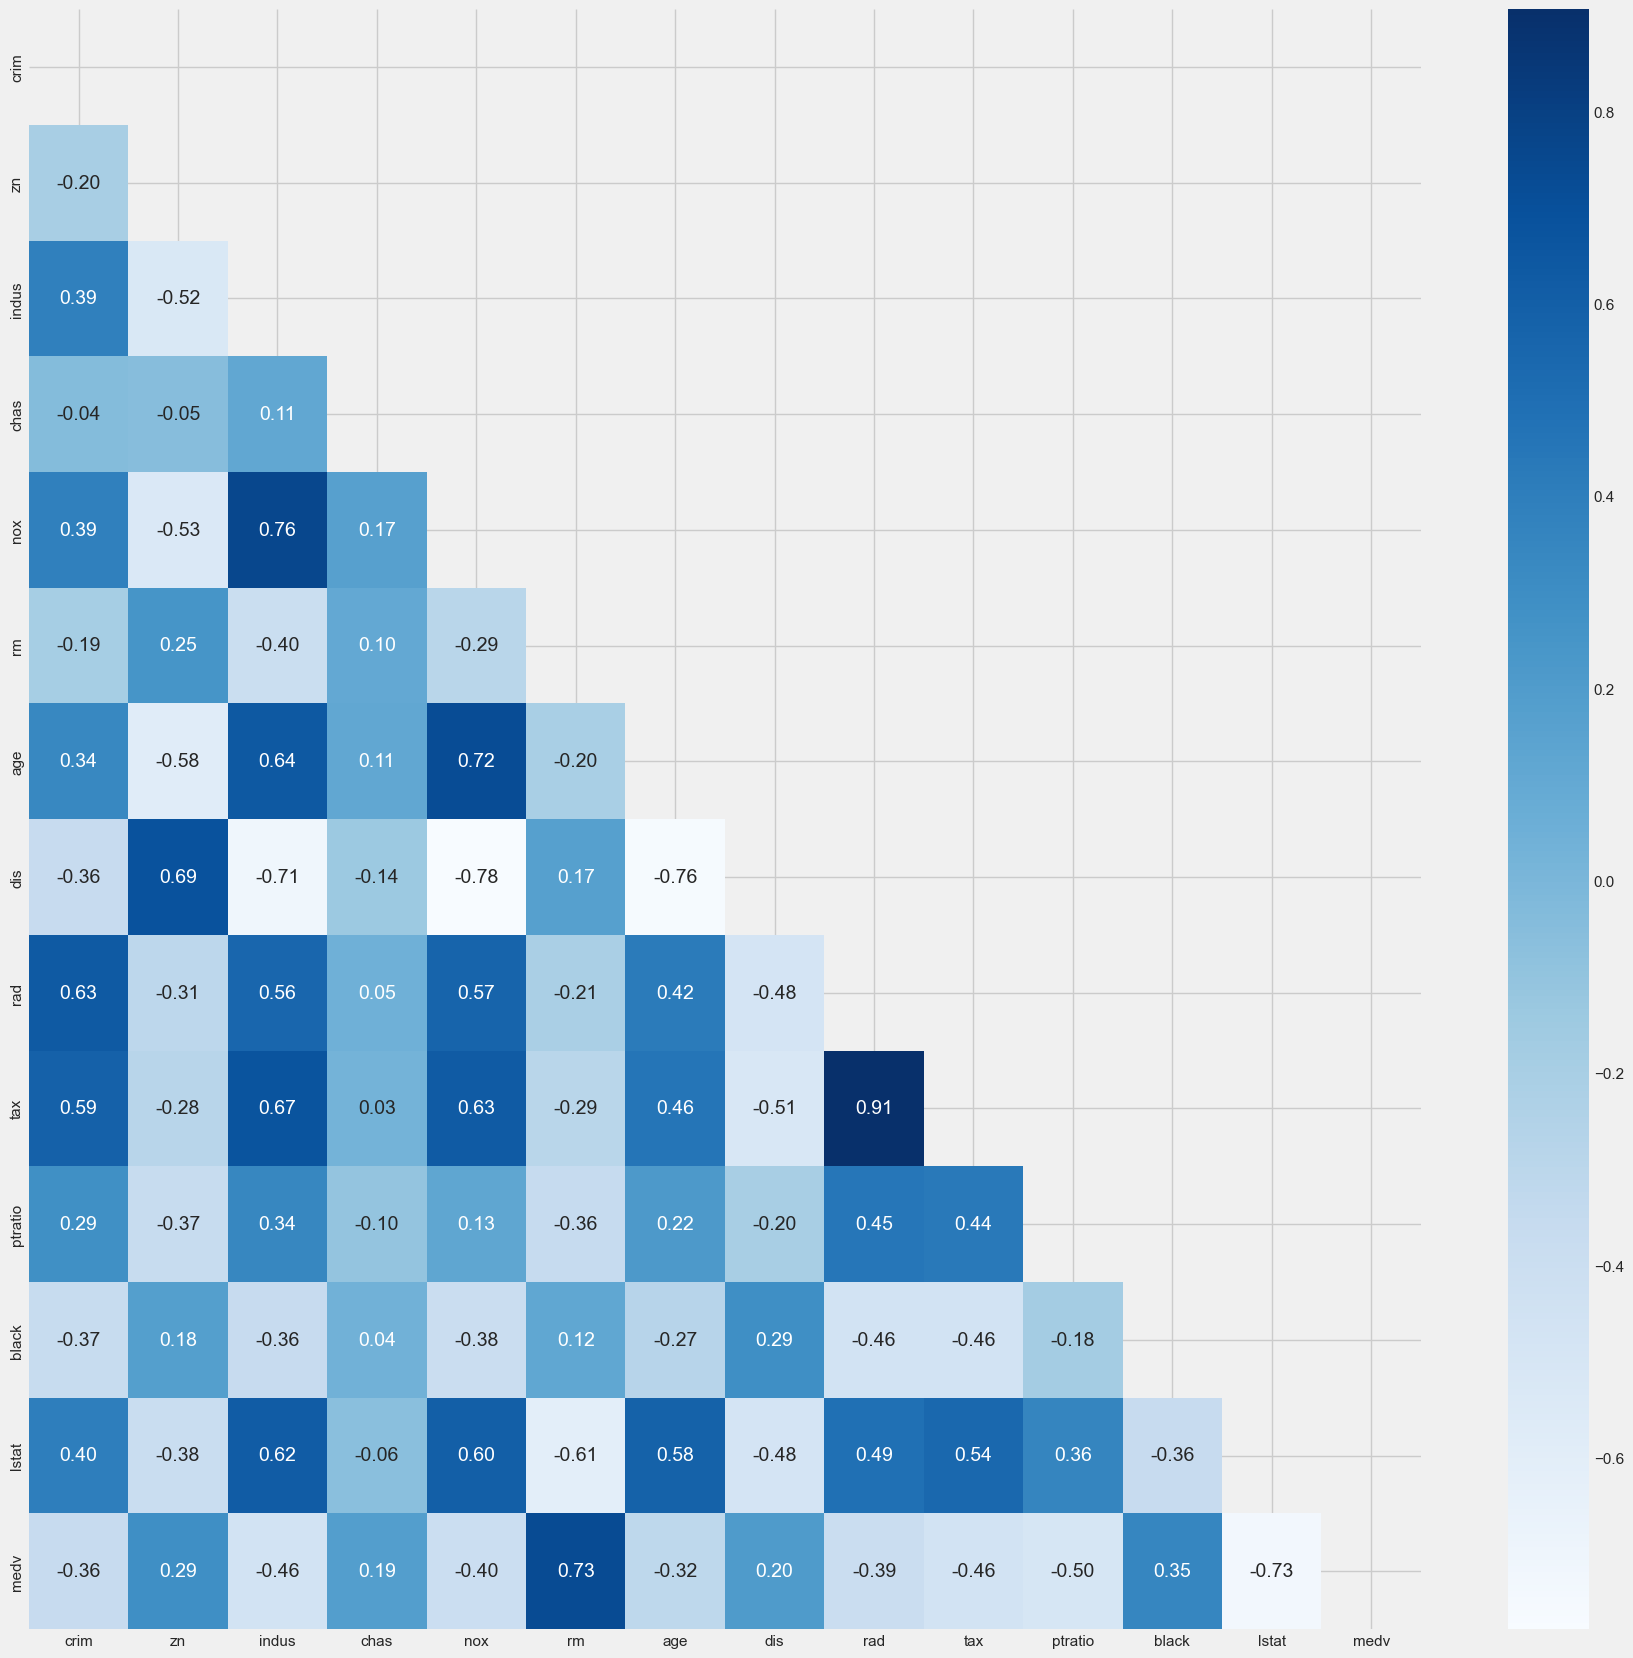

In [12]:
# heatmap correlation
boston_train = pd.concat([feature_boston_train, target_boston_train], axis=1)
corr = boston_train.corr()

plt.figure(figsize=(20,20))

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, cmap = 'Blues', annot=True, fmt='.2f', mask = mask)
plt.show()

Based on correlation heatmap, it is aligned with VIF score, that nox, dis, rad, and tax have high correlation with other features with correlation >0.7. Hence, nox, dis, and rad will not be used further for modeling, because they have lower correlation with the target than tax.  

In [13]:
feature_boston_train = feature_boston_train.drop(columns=['nox', 'dis', 'rad'])
feature_boston_test = feature_boston_test.drop(columns=['nox', 'dis', 'rad'])
feature_boston_validation = feature_boston_validation.drop(columns=['nox', 'dis', 'rad'])


In [14]:
X = add_constant(feature_boston_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.596586
2,zn,1.832693
3,indus,2.970810
4,chas,1.078919
5,rm,1.891979
6,age,2.491050
7,tax,2.827854
8,ptratio,1.480472
9,black,1.346511
10,lstat,2.935815


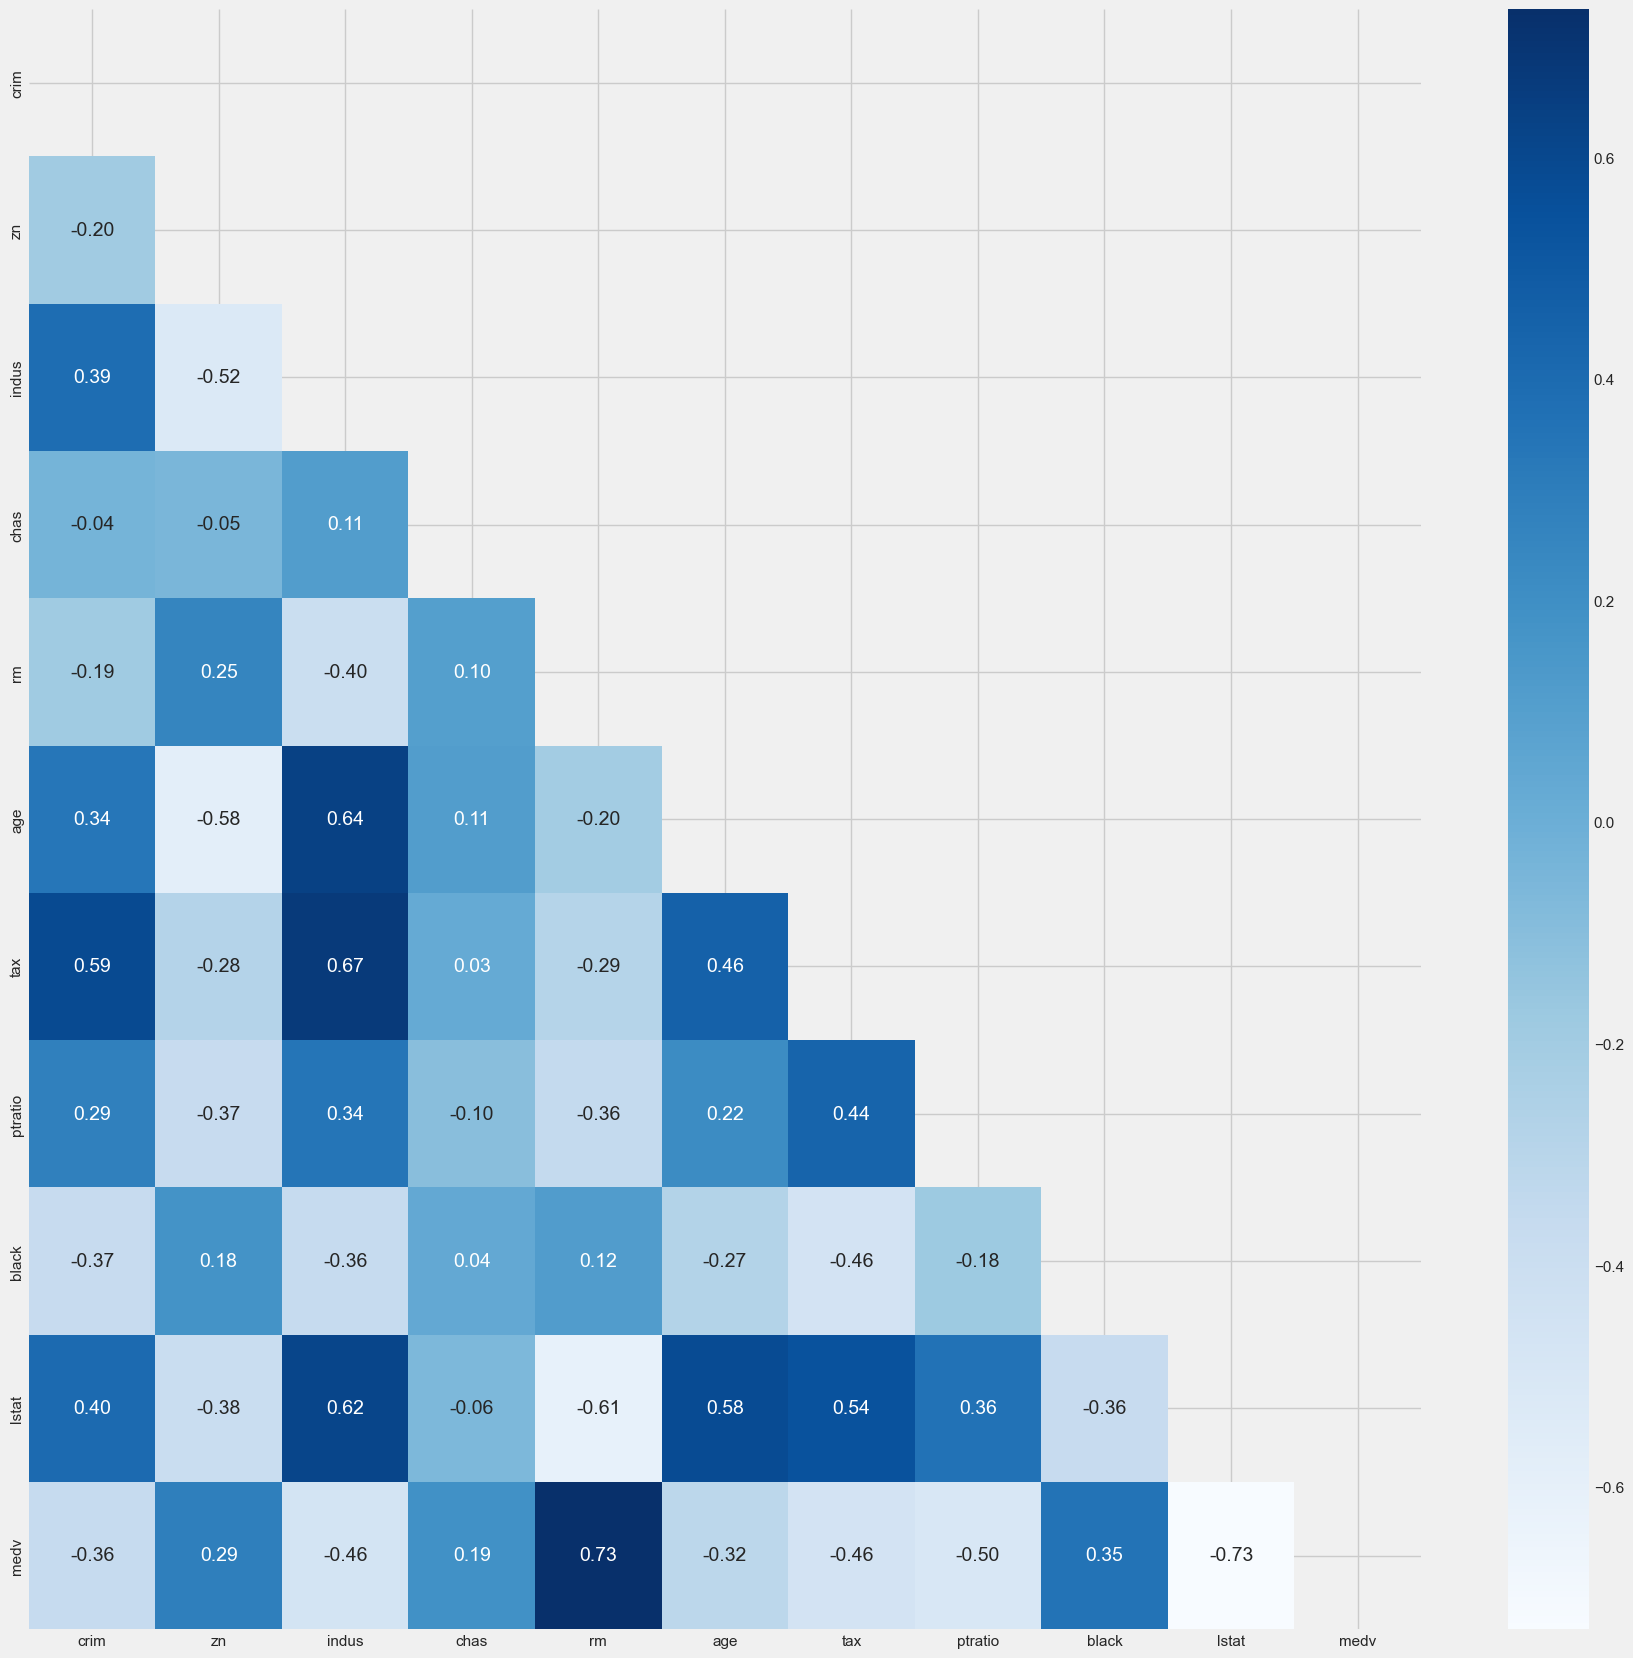

In [15]:
boston_train = boston_train.drop(columns=['nox', 'dis', 'rad'])
corr = boston_train.corr()
plt.figure(figsize=(20,20))

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, cmap = 'Blues', annot=True, fmt='.2f', mask = mask)
plt.show()

After performing recheck for VIF score and heatmap correlation, the dataset is no longer have features that have high multicollinearity.

# Training Model using Ridge Regression

## Training Model using alpha (0.01, 0.1, 1, 10)

In [16]:
X_boston_train = feature_boston_train.to_numpy()
y_boston_train = target_boston_train.to_numpy()
y_boston_train = y_boston_train.reshape((len(y_boston_train),))

ridge_lambda_pointzeroone = Ridge(alpha = 0.01, random_state = 42)
ridge_lambda_pointone = Ridge(alpha = 0.1, random_state = 42)
ridge_lambda_one = Ridge(alpha = 1, random_state = 42)
ridge_lambda_ten = Ridge(alpha = 10, random_state = 42)

ridge_lambda_pointzeroone.fit(X_boston_train, y_boston_train)
ridge_lambda_pointone.fit(X_boston_train, y_boston_train)
ridge_lambda_one.fit(X_boston_train, y_boston_train)
ridge_lambda_ten.fit(X_boston_train, y_boston_train)


Ridge(alpha=10, random_state=42)

In [17]:
X_boston_validation = feature_boston_validation.to_numpy()
y_boston_validation = target_boston_validation.to_numpy()
y_boston_validation = y_boston_validation.reshape((len(y_boston_validation),))

alphas = [0.01, 0.1, 1, 10]
models = [ridge_lambda_pointzeroone,
          ridge_lambda_pointone,
          ridge_lambda_one,
          ridge_lambda_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_boston_validation)
    rmse = np.sqrt(mean_squared_error(y_boston_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 5.100886202642038
RMSE of Ridge regression model with alpha = 0.1 is 5.100288438419683
RMSE of Ridge regression model with alpha = 1 is 5.094521787042946
RMSE of Ridge regression model with alpha = 10 is 5.05166207510316


Based on Root Mean Squared Error (RMSE) value, the best model from Ridge Regression is the model with alpha value 10, since it give the lowest value of RMSE. 

## Ridge Regression Coefficient

In [18]:
ridge_best = ridge_lambda_ten

coef_df_ridge = pd.DataFrame({
    'feature':['intercept'] + feature_boston_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df_ridge

,feature,coefficient
0,intercept,7.068423
1,crim,-0.052216
2,zn,-0.007855
3,indus,0.034094
4,chas,2.061822
5,rm,5.041802
6,age,0.020313
7,tax,-0.000312
8,ptratio,-0.845843
9,black,0.012919


From the regression coefficient, Number rooms average (rm) have the highest influence for the prediction. Each increment of average room number will increase the housing price in Boston by 2.06. Tax rate (tax) has relatively no impact to pricing prediction, since their coefficient is near zero. 


## Training Model Lasso

## Training Model using alpha (0.01, 0.1, 1, 10)

In [19]:
lasso_lambda_pointzeroone = Lasso(alpha = 0.01, random_state = 42)
lasso_lambda_pointone = Lasso(alpha = 0.1, random_state = 42)
lasso_lambda_one = Lasso(alpha = 1, random_state = 42)
lasso_lambda_ten = Lasso(alpha = 10, random_state = 42)

lasso_lambda_pointzeroone.fit(X_boston_train, y_boston_train)
lasso_lambda_pointone.fit(X_boston_train, y_boston_train)
lasso_lambda_one.fit(X_boston_train, y_boston_train)
lasso_lambda_ten.fit(X_boston_train, y_boston_train)

Lasso(alpha=10, random_state=42)

In [20]:
alphas = [0.01, 0.1, 1, 10]
models = [lasso_lambda_pointzeroone,
          lasso_lambda_pointone,
          lasso_lambda_one,
          lasso_lambda_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_boston_validation)
    rmse = np.sqrt(mean_squared_error(y_boston_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 5.0975145904984664
RMSE of Lasso regression model with alpha = 0.1 is 5.080169848064391
RMSE of Lasso regression model with alpha = 1 is 4.988309999786156
RMSE of Lasso regression model with alpha = 10 is 5.426622694252769


With the same treatment as Ridge Regression, the best model from Lasso Regression is the model with alpha value 1, since it give the lowest value of RMSE. Since, Lasso Regression with alpha = 1 give the lowest value of RMSE, Lasso Regression will be used as the model for house pricing in Boston city.

## Lasso Regression Coefficient

In [21]:
lasso_best = lasso_lambda_one

coef_df_lasso = pd.DataFrame({
    'feature':['intercept'] + feature_boston_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df_lasso

,feature,coefficient
0,intercept,22.945673
1,crim,-0.034953
2,zn,0.001941
3,indus,-0.000000
4,chas,0.000000
5,rm,2.572882
6,age,0.041419
7,tax,-0.001003
8,ptratio,-0.757735
9,black,0.011371


From the regression coefficient, Number rooms average (rm) have the highest influence for the prediction, which is similar to coefficient from Ridge Regression. Each increment of average room number will increase the housing price in Boston by 2.57. Non-retail business acres proportion (indus), Is bounds with river (chas), and Tax rate (tax) have relatively no impact to pricing prediction, since their coefficient is near zero. 


# Diagnostic Study for Linear Regression Assumption Check

In [22]:
y_predict_train = lasso_best.predict(X_boston_train)

print('R-squared for training data is {}'.format(r2_score(y_boston_train, y_predict_train)))

R-squared for training data is 0.6908222586747164


R2 score is relatively good as the model can learn 69.08% pattern from training data. 

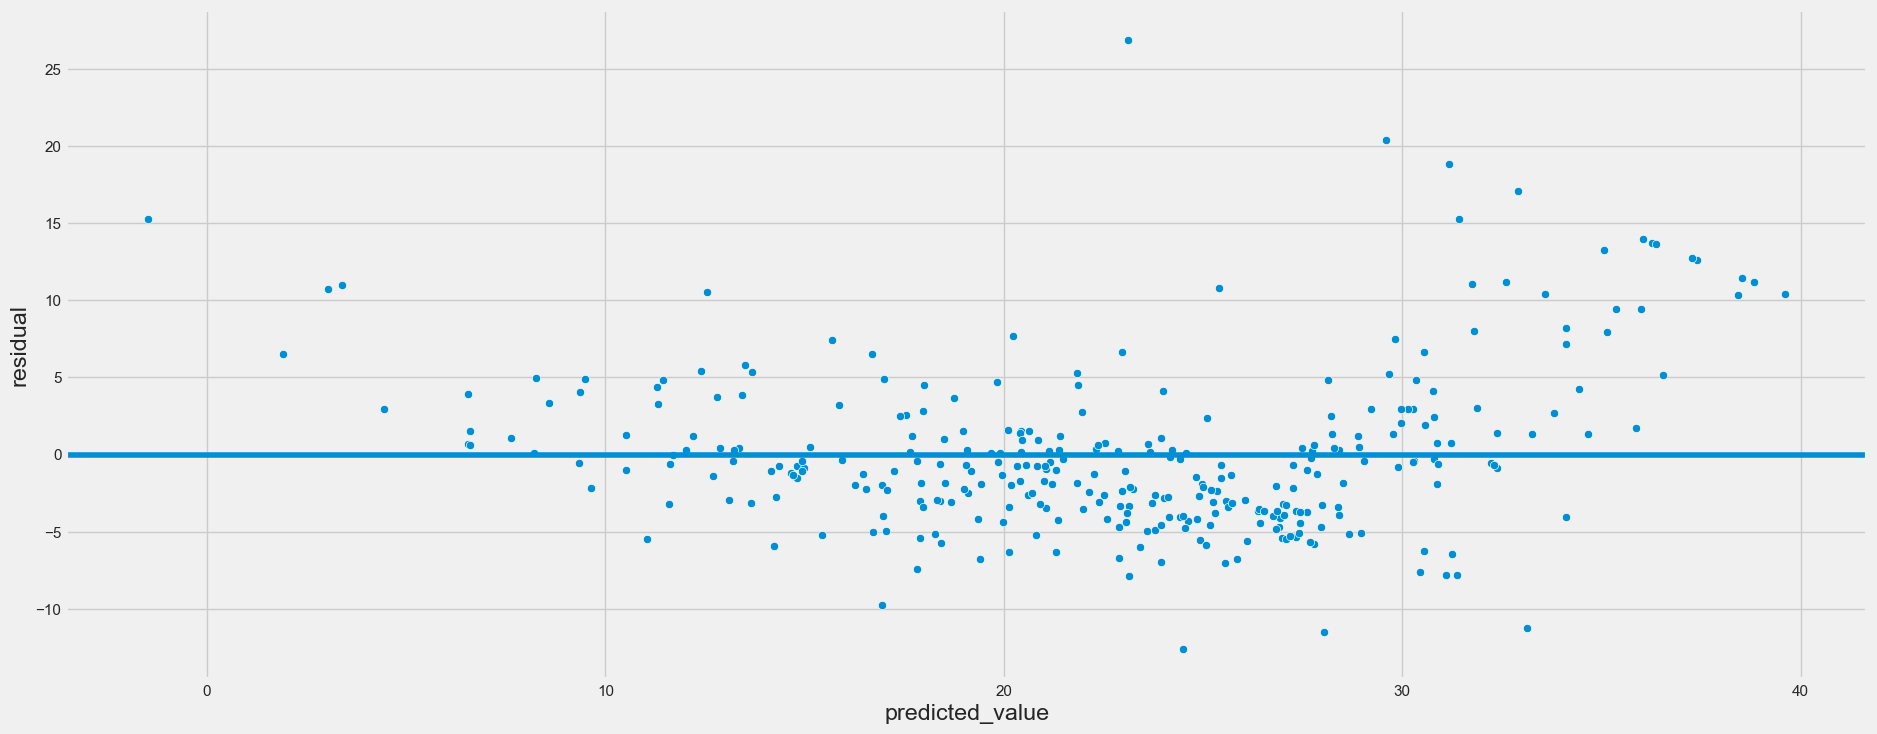

In [23]:
# residual calculation
residual = y_boston_train - y_predict_train

# checking assumption using residual plot
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

Interpretation of Linear Regression Assumption:
1. Linear Relationship: Yes, the data is centralized near line y = 0.
2. Constant variance: No, the variance is gradually increased from left to right. 
3. Independent residual: No, there are pattern for residual that located near each other.

# Model Testing using Evaluation Metric (MAE, MAPE, and RMSE)

In [24]:
# prediction based on data test
X_boston_test = feature_boston_test.to_numpy()
y_predict_test = lasso_best.predict(X_boston_test)

# data test to numpy
y_boston_test = target_boston_test.to_numpy()
y_boston_test = y_boston_test.reshape(len(y_boston_test),)

In [25]:
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_boston_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_boston_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_boston_test, y_predict_test)))

RMSE for testing data is 5.3156467257341
MAE for testing data is 3.5356849076772963
MAPE for testing data is 0.18439385451147547


Interpretation:
1. Root Mean Squared Error (RMSE) is 5.32, which is quite good because the range of target variable is 45 (from 5 to 50).
2. Mean Absolute Error (MAE) is 3.54. This means that the model have average deviation from the true value by 3.54. This is a small value compared to the range of target, which is 45.
3. Mean Absolute Percentage Error (MAPE) is 18.44%, this value represents the percentage value of MAE. With the small value of percentage error, the model will be performed well to predict housing price in Boston city. 